In [1]:
import numpy as np
from PDEsolver import *
import matplotlib.pyplot as plt

from matplotlib import rcParams

params = {'legend.fontsize': 'medium',
         'axes.labelsize': 'x-large',
         'axes.titlesize':'medium',
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium',
         'font.family': 'sans-serif',
         'text.usetex': True}
rcParams.update(params)

In [2]:
Nx = 150
Ny = 150
Lx = 7
Ly = 7
dt = .01
tmax = 50
dx = Lx/Nx
dy = Ly/Ny
D,r,pmax = 1.07337996e+03*1e-6, 2.93135177e-01, 5.11310719e+03

print(dx,dy)
xspan = np.linspace(-Lx + dx/2, Lx - dx/2, int(2*Nx))
yspan = np.linspace(-Ly + dy/2, Ly - dy/2, int(2*Ny))

X,Y = np.meshgrid(xspan,yspan)

x, y = np.linspace(-Lx,Lx,500), np.linspace(-Lx,Lx,500)
X2,Y2 = np.meshgrid(x,y)


dens_i = 2600

init_rho_1 = np.array([[dens_i if (i+1.2 + (.75/2-.25))**2 + (j)**2 < 1.2**2 else 0 for i in xspan] for j in yspan])
init_rho_2 = np.array([[dens_i if abs(i - .25 - (.75/2+.25)) < .75/2 and abs(j) < 7.5/2 else 0 for i in xspan] for j in yspan])

0.04666666666666667 0.04666666666666667


In [53]:
solver = fisher_2species(Lx,Ly,Nx,Ny,dt,init_rho_1,init_rho_2,tmax,D,r,pmax) # Fisher model
rho_sol = solver.solve()

Linear diffusion model


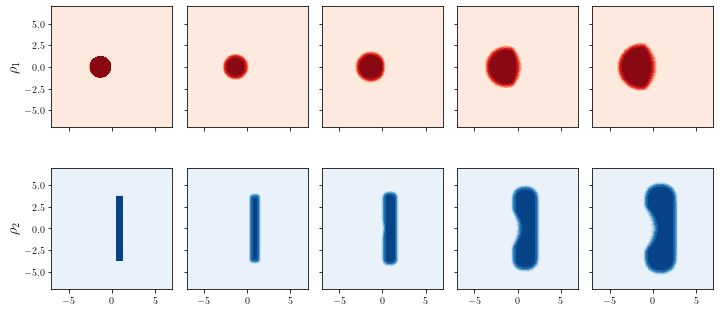

In [60]:
rho1 = np.array([rho_sol[i][0] for i in range(len(rho_sol)) if i%10 == 0])
rho2 = np.array([rho_sol[i][1] for i in range(len(rho_sol)) if i%10 == 0])
fig,ax = plt.subplots(2,5,figsize = (10,5))

print('Linear diffusion model')

indexes = [0,100,200,400,500]

for i in range(5):
    ax[0,i].contourf(X,Y,rho1[indexes[i]],cmap = 'Reds')
    ax[1,i].contourf(X,Y,rho2[indexes[i]],cmap = 'Blues')
    ax[0,i].set_xticklabels([])
    ax[0,i].set_aspect('equal')
    ax[1,i].set_aspect('equal')
    if i > 0:
        ax[0,i].set_yticklabels([])
        ax[1,i].set_yticklabels([])

ax[0,0].set_ylabel('$\\rho_1$')
ax[1,0].set_ylabel('$\\rho_2$')
plt.tight_layout()
plt.show()

In [3]:
D,r,pmax = 0.0011982965199849086*1e-3, 0.21258222483199546, 5320.799183670731
solver = porous_2species(Lx,Ly,Nx,Ny,dt,init_rho_1,init_rho_2,tmax,D,r,pmax) # Porous model
rho_sol = solver.solve()

Nonlinear diffusion model


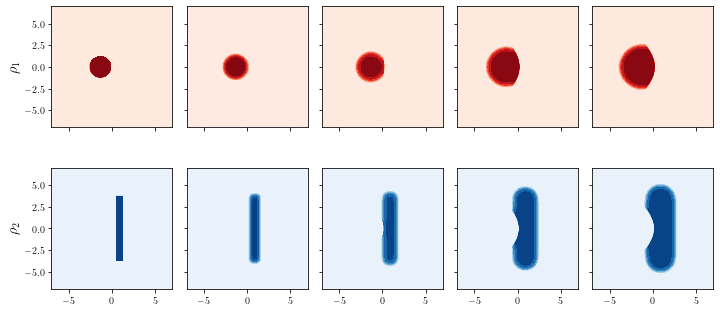

In [7]:
rho1 = np.array([rho_sol[i][0] for i in range(len(rho_sol)) if i%10 == 0])
rho2 = np.array([rho_sol[i][1] for i in range(len(rho_sol)) if i%10 == 0])
fig,ax = plt.subplots(2,5,figsize = (10,5))

print('Nonlinear diffusion model')

indexes = [0,100,200,400,500]

for i in range(5):
    ax[0,i].contourf(X,Y,rho1[indexes[i]] + 1e-67,cmap = 'Reds')
    ax[1,i].contourf(X,Y,rho2[indexes[i]],cmap = 'Blues')
    ax[0,i].set_xticklabels([])
    ax[0,i].set_aspect('equal')
    ax[1,i].set_aspect('equal')
    if i > 0:
        ax[0,i].set_yticklabels([])
        ax[1,i].set_yticklabels([])

ax[0,0].set_ylabel('$\\rho_1$')
ax[1,0].set_ylabel('$\\rho_2$')
plt.tight_layout()
plt.show()